In [89]:
import pandas as pd
import numpy as np

In [90]:
house_df = pd.read_csv("House Price Prediction Dataset.csv")
house_df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [91]:
print(house_df.isnull().sum())  # Shows the count of missing values per column
house_df = house_df.dropna()


Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [92]:
def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

In [93]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [94]:
Garage_codes = {"Yes": 1, "No": 0}
house_df['Garage'] = house_df['Garage'].map(Garage_codes)

In [108]:
enc = preprocessing.OneHotEncoder()
enc.fit(house_df[['Location']])
enc.categories_
one_hot = enc.transform(house_df[['Location']]).toarray()
house_df[['Downtown', 'Rural', 'Suburban', 'Urban']] = one_hot

In [109]:
end = preprocessing.OneHotEncoder()
end.fit(house_df[['Condition']])
end.categories_
one_hot = end.transform(house_df[['Condition']]).toarray()
house_df[['Excellent', 'Fair', 'Good', 'Poor']] = one_hot

In [100]:
numeric_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
scaler = StandardScaler()
scaler.fit(house_df[numeric_cols])

StandardScaler()

In [110]:
scaled_inputs = scaler.transform(house_df[numeric_cols])
cat_cols = ['Downtown', 'Rural', 'Suburban', 'Urban', 'Excellent', 'Fair', 'Good', 'Poor', 'Garage']
categorical_data = house_df[cat_cols].values

In [111]:
model = LinearRegression()
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
target = house_df['Price']
model.fit(inputs, target)
predictions = model.predict(inputs)
loss = rmse(target, predictions)
print("Loss: ", loss)

Loss:  275212.4701846433


In [105]:
model.coef_

array([   119.91700069,   -878.66597729,  -4443.96806065,  15830.861797  ,
         1793.07116963,  -1233.81942705,    359.96691758,  19857.81258234,
       -18983.96007288,  -6258.27637683,  23044.91931182,  -8172.91034428,
        -8613.73259071,    551.54879733])

In [106]:
model.intercept_

np.float64(537141.6572478544)

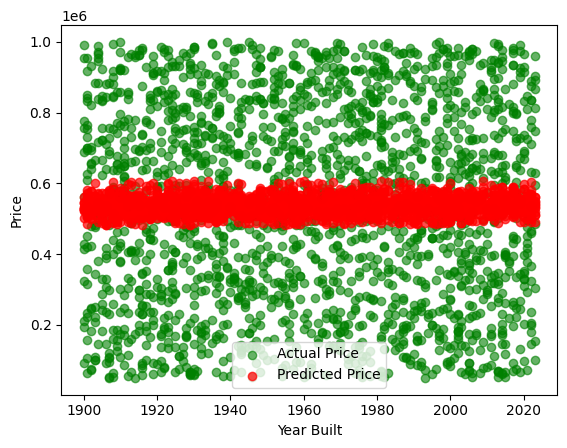

In [107]:
from matplotlib import pyplot as plt

plt.scatter(house_df['YearBuilt'], target, color = "green", label = "Actual Price", alpha=0.6)
plt.scatter(house_df['YearBuilt'], predictions, color = "red", label = "Predicted Price", alpha=0.7)
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.legend()
plt.show()